<a href="https://colab.research.google.com/github/danieltumanggor/UTS-Pengolahan-Citra-Daniel-Tumanggor/blob/main/Pengolahan_Citra_Minggu_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import mean_squared_error, peak_signal_noise_ratio, structural_similarity
import os


✅ Gambar berhasil dibaca!


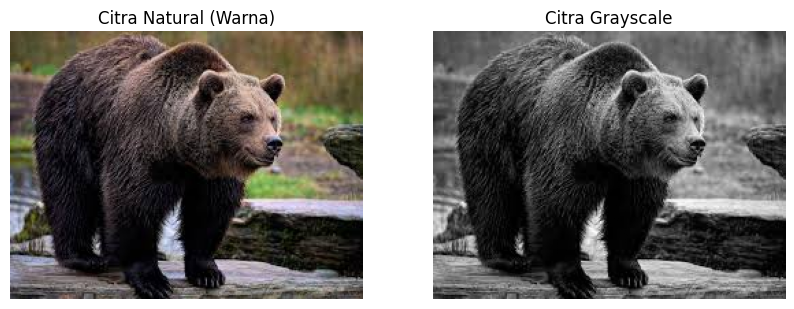

In [ ]:
# Load gambar
img_color = cv2.imread("beruang.jpg")

# Validasi jika gambar gagal dibaca
if img_color is None:
    print("❌ Gambar tidak ditemukan, cek nama file!")
else:
    print("✅ Gambar berhasil dibaca!")

# Konversi BGR ke RGB
img_color = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)

# Buat versi grayscale
img_gray = cv2.cvtColor(img_color, cv2.COLOR_RGB2GRAY)

# Tampilkan
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(img_color)
plt.title("Citra Natural (Warna)")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(img_gray, cmap="gray")
plt.title("Citra Grayscale")
plt.axis("off")

plt.show()


In [ ]:
os.makedirs("output", exist_ok=True)

cv2.imwrite("output/original_color.png", cv2.cvtColor(img_color, cv2.COLOR_RGB2BGR))
cv2.imwrite("output/original_gray.png", img_gray)

print("✅ File original disimpan")


✅ File original disimpan


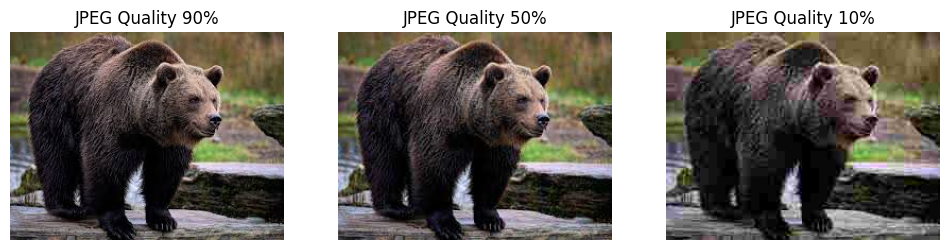

In [ ]:
qualities = [90, 50, 10]
compressed_images = {}

for q in qualities:
    filename = f"output/beruang_q{q}.jpg"

    cv2.imwrite(
        filename,
        cv2.cvtColor(img_color, cv2.COLOR_RGB2BGR),
        [int(cv2.IMWRITE_JPEG_QUALITY), q]
    )

    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    compressed_images[q] = img

# Tampilkan hasil kompresi
plt.figure(figsize=(12,4))
for i, q in enumerate(qualities):
    plt.subplot(1,3,i+1)
    plt.imshow(compressed_images[q])
    plt.title(f"JPEG Quality {q}%")
    plt.axis("off")

plt.show()


In [ ]:
def compression_ratio(original_path, compressed_path):
    return os.path.getsize(original_path) / os.path.getsize(compressed_path)

results = []

for q in qualities:
    comp_path = f"output/beruang_q{q}.jpg"
    cr = compression_ratio("output/original_color.png", comp_path)

    comp_img = compressed_images[q]
    mse = mean_squared_error(img_color, comp_img)
    psnr = peak_signal_noise_ratio(img_color, comp_img, data_range=255)
    ssim = structural_similarity(img_color, comp_img, channel_axis=2)

    results.append([q, cr, mse, psnr, ssim])

results


[[90,
  5.863832701222082,
  np.float64(1.8923561672731108),
  np.float64(45.3607748095655),
  np.float64(0.9968266902202497)],
 [50,
  13.031959728400842,
  np.float64(72.76083030111269),
  np.float64(29.511827145510367),
  np.float64(0.9031330689021321)],
 [10,
  32.6928046989721,
  np.float64(218.10817776723093),
  np.float64(24.744084115083727),
  np.float64(0.7081003669813585)]]

In [ ]:
import pandas as pd
df = pd.DataFrame(results, columns=["Quality", "Compression Ratio", "MSE", "PSNR", "SSIM"])
df


,Quality,Compression Ratio,MSE,PSNR,SSIM
0,90,5.863833,1.892356,45.360775,0.996827
1,50,13.031960,72.760830,29.511827,0.903133
2,10,32.692805,218.108178,24.744084,0.708100


In [ ]:
import os

# Pastikan folder ada
os.makedirs("output", exist_ok=True)

# Simpan ulang file original
cv2.imwrite("output/original_color.png", cv2.cvtColor(img_color, cv2.COLOR_RGB2BGR))
cv2.imwrite("output/original_gray.png", img_gray)

print("Isi folder output:")
print(os.listdir("output"))


Isi folder output:
['beruang_lossless.png', 'beruang_lossless.gif', 'beruang_q90.jpg', 'text_q10.jpg', 'beruang_q50.jpg', 'original_color.png', 'original_gray.png', 'beruang_q10.jpg']


In [ ]:
def compression_ratio(original_path, compressed_path):
    original_size = os.path.getsize(original_path)
    compressed_size = os.path.getsize(compressed_path)

    if compressed_size == 0:
        print("⚠️ File kosong:", compressed_path)
        return None

    return original_size / compressed_size


In [ ]:
# Simpan PNG (lossless)
png_path = "output/beruang_lossless.png"
cv2.imwrite(png_path, cv2.cvtColor(img_color, cv2.COLOR_RGB2BGR))

# Simpan GIF (pakai grayscale)
gif_path = "output/beruang_lossless.gif"
cv2.imwrite(gif_path, img_gray)

print("Isi folder output:")
print(os.listdir("output"))

# Hitung Compression Ratio
cr_png = compression_ratio("output/original_color.png", png_path)
cr_gif = compression_ratio("output/original_gray.png", gif_path)

print("Compression Ratio PNG:", cr_png)
print("Compression Ratio GIF:", cr_gif)


Isi folder output:
['beruang_lossless.png', 'beruang_lossless.gif', 'beruang_q90.jpg', 'text_q10.jpg', 'beruang_q50.jpg', 'original_color.png', 'original_gray.png', 'beruang_q10.jpg']
⚠️ File kosong: output/beruang_lossless.gif
Compression Ratio PNG: 1.0
Compression Ratio GIF: None


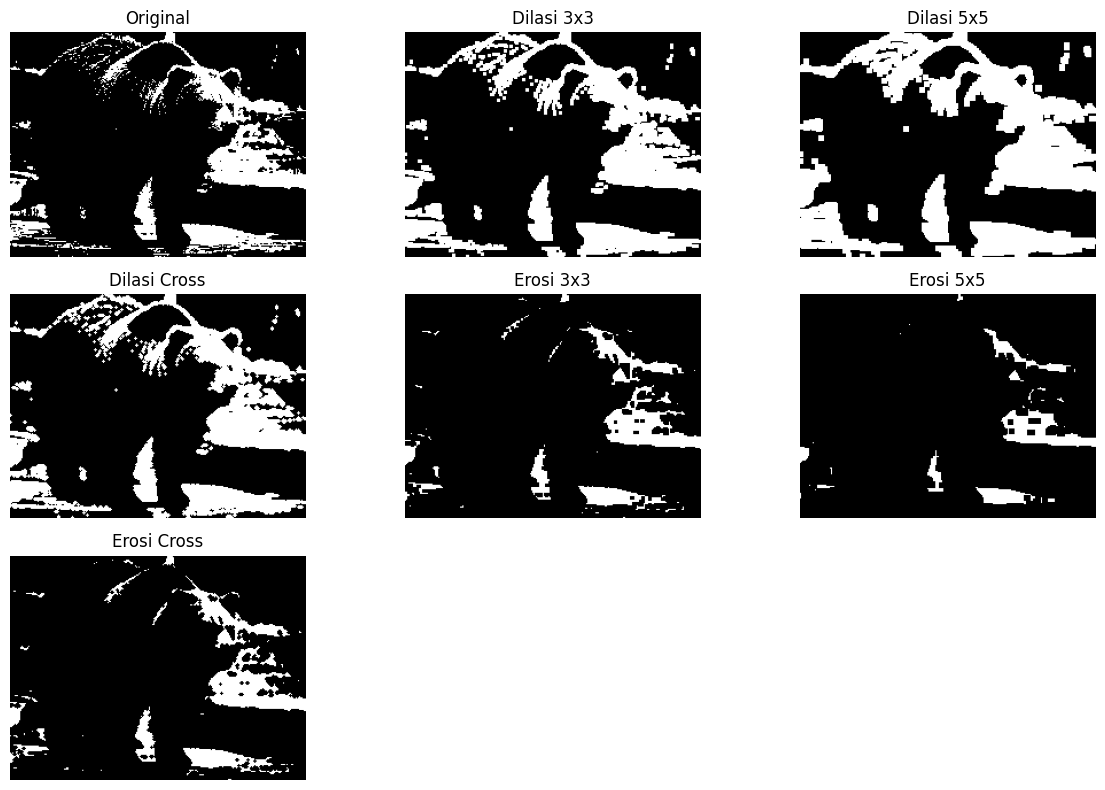

In [ ]:
# Pastikan citra biner sudah ada
_, binary = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)

# Structuring Element
kernel3 = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
kernel5 = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
kernel_cross = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))

# Dilasi
dilate3 = cv2.dilate(binary, kernel3)
dilate5 = cv2.dilate(binary, kernel5)
dilate_cross = cv2.dilate(binary, kernel_cross)

# Erosi
erode3 = cv2.erode(binary, kernel3)
erode5 = cv2.erode(binary, kernel5)
erode_cross = cv2.erode(binary, kernel_cross)

# Visualisasi
plt.figure(figsize=(12,8))

images = [binary, dilate3, dilate5, dilate_cross, erode3, erode5, erode_cross]
titles = ["Original", "Dilasi 3x3", "Dilasi 5x5", "Dilasi Cross",
          "Erosi 3x3", "Erosi 5x5", "Erosi Cross"]

for i in range(len(images)):
    plt.subplot(3,3,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis("off")

plt.tight_layout()
plt.show()


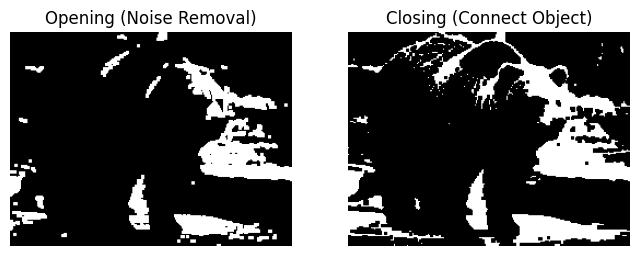

In [ ]:
opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel3)
closing = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel3)

plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.imshow(opening, cmap='gray')
plt.title("Opening (Noise Removal)")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(closing, cmap='gray')
plt.title("Closing (Connect Object)")
plt.axis("off")

plt.show()


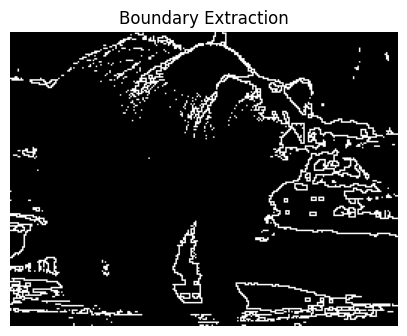

In [ ]:
eroded = cv2.erode(binary, kernel3)
boundary = cv2.subtract(binary, eroded)

plt.figure(figsize=(5,5))
plt.imshow(boundary, cmap='gray')
plt.title("Boundary Extraction")
plt.axis("off")
plt.show()


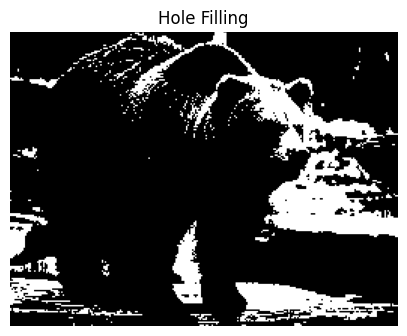

In [ ]:
# Invert image
inv = cv2.bitwise_not(binary)

# Flood fill
h, w = inv.shape
mask = np.zeros((h+2, w+2), np.uint8)
floodfill = inv.copy()
cv2.floodFill(floodfill, mask, (0,0), 255)

# Invert floodfill
floodfill_inv = cv2.bitwise_not(floodfill)

# Combine
filled = binary | floodfill_inv

plt.figure(figsize=(5,5))
plt.imshow(filled, cmap='gray')
plt.title("Hole Filling")
plt.axis("off")
plt.show()


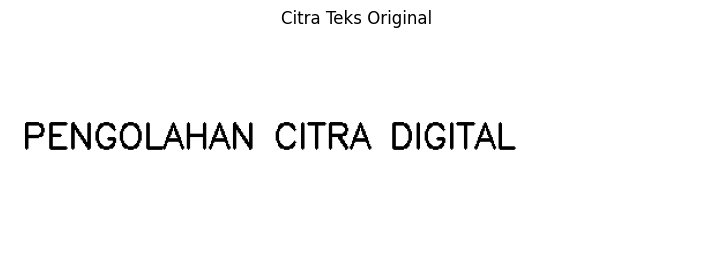

In [ ]:
# Buat canvas putih
text_img = np.ones((200,600), dtype=np.uint8) * 255

# Tulis teks
cv2.putText(text_img, "PENGOLAHAN CITRA DIGITAL", (10,100),
            cv2.FONT_HERSHEY_SIMPLEX, 1, (0), 2)

plt.figure(figsize=(10,3))
plt.imshow(text_img, cmap='gray')
plt.title("Citra Teks Original")
plt.axis("off")
plt.show()


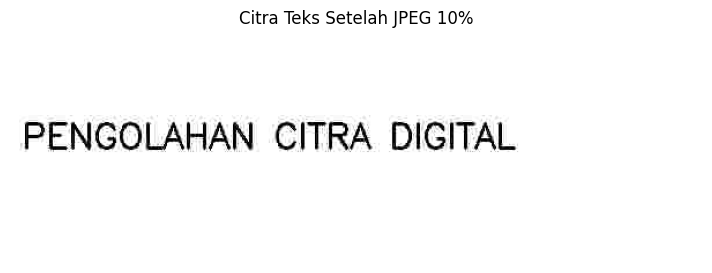

In [ ]:
cv2.imwrite("output/text_q10.jpg", text_img, [int(cv2.IMWRITE_JPEG_QUALITY), 10])

text_compressed = cv2.imread("output/text_q10.jpg", 0)

plt.figure(figsize=(10,3))
plt.imshow(text_compressed, cmap='gray')
plt.title("Citra Teks Setelah JPEG 10%")
plt.axis("off")
plt.show()


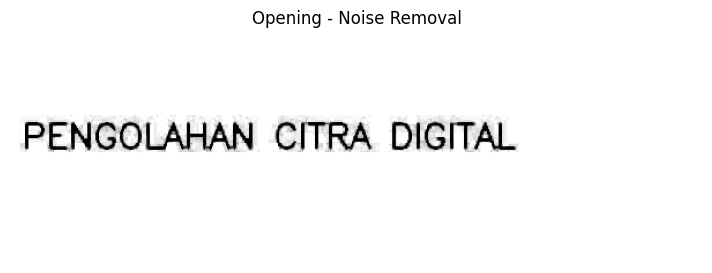

In [ ]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
opening_text = cv2.morphologyEx(text_compressed, cv2.MORPH_OPEN, kernel)

plt.figure(figsize=(10,3))
plt.imshow(opening_text, cmap='gray')
plt.title("Opening - Noise Removal")
plt.axis("off")
plt.show()


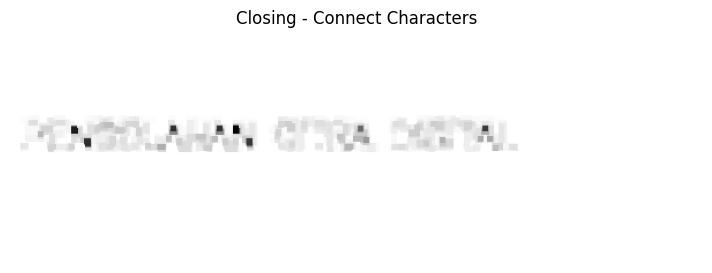

In [ ]:
kernel_close = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
closing_text = cv2.morphologyEx(opening_text, cv2.MORPH_CLOSE, kernel_close)

plt.figure(figsize=(10,3))
plt.imshow(closing_text, cmap='gray')
plt.title("Closing - Connect Characters")
plt.axis("off")
plt.show()


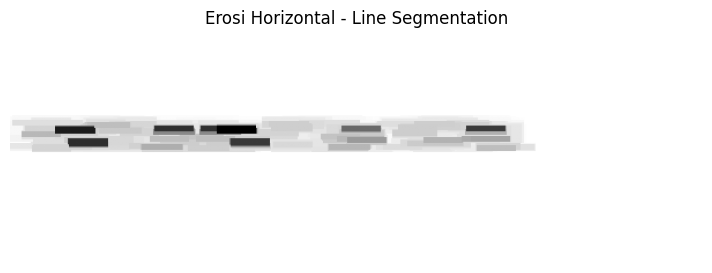

In [ ]:
kernel_horizontal = cv2.getStructuringElement(cv2.MORPH_RECT, (30,1))
eroded_text = cv2.erode(closing_text, kernel_horizontal)

plt.figure(figsize=(10,3))
plt.imshow(eroded_text, cmap='gray')
plt.title("Erosi Horizontal - Line Segmentation")
plt.axis("off")
plt.show()


In [ ]:
import pandas as pd
from skimage.metrics import mean_squared_error, peak_signal_noise_ratio, structural_similarity
import os

qualities = [90, 50, 10]
results = []

def compression_ratio(original_path, compressed_path):
    original_size = os.path.getsize(original_path)
    compressed_size = os.path.getsize(compressed_path)
    return original_size / compressed_size

for q in qualities:
    path = f"output/beruang_q{q}.jpg"

    comp = cv2.imread(path)
    comp = cv2.cvtColor(comp, cv2.COLOR_BGR2RGB)

    cr = compression_ratio("output/original_color.png", path)
    mse = mean_squared_error(img_color, comp)
    psnr = peak_signal_noise_ratio(img_color, comp, data_range=255)
    ssim = structural_similarity(img_color, comp, channel_axis=2)

    results.append([q, cr, mse, psnr, ssim])

df = pd.DataFrame(results, columns=["Quality", "Compression Ratio", "MSE", "PSNR", "SSIM"])
df


,Quality,Compression Ratio,MSE,PSNR,SSIM
0,90,5.863833,1.892356,45.360775,0.996827
1,50,13.031960,72.760830,29.511827,0.903133
2,10,32.692805,218.108178,24.744084,0.708100


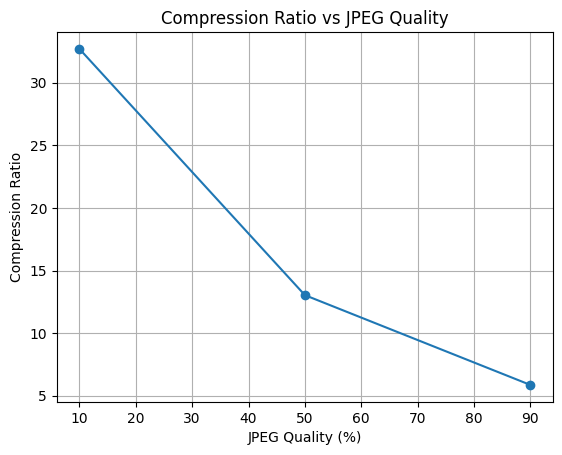

In [ ]:
plt.figure()
plt.plot(df["Quality"], df["Compression Ratio"], marker='o')
plt.xlabel("JPEG Quality (%)")
plt.ylabel("Compression Ratio")
plt.title("Compression Ratio vs JPEG Quality")
plt.grid(True)
plt.show()


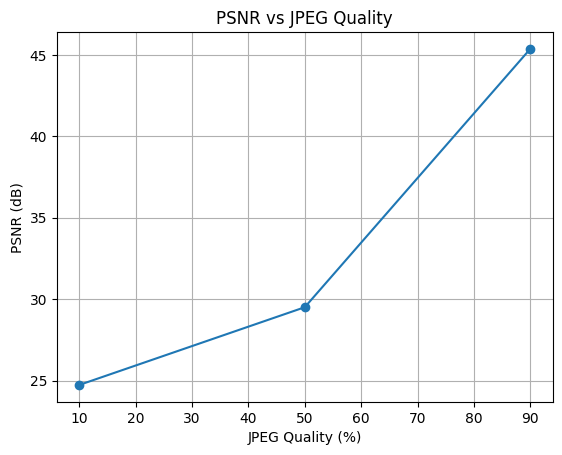

In [ ]:
plt.figure()
plt.plot(df["Quality"], df["PSNR"], marker='o')
plt.xlabel("JPEG Quality (%)")
plt.ylabel("PSNR (dB)")
plt.title("PSNR vs JPEG Quality")
plt.grid(True)
plt.show()


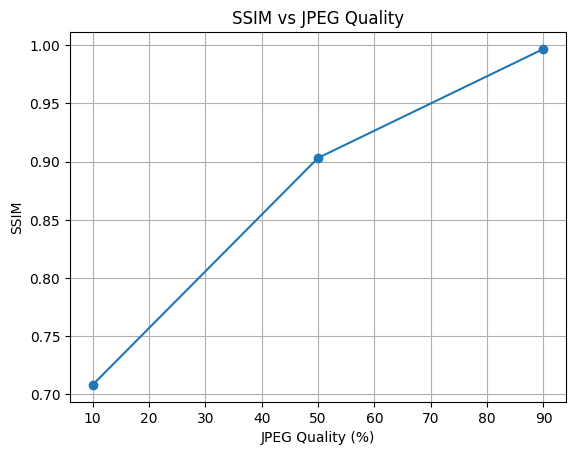

In [ ]:
plt.figure()
plt.plot(df["Quality"], df["SSIM"], marker='o')
plt.xlabel("JPEG Quality (%)")
plt.ylabel("SSIM")
plt.title("SSIM vs JPEG Quality")
plt.grid(True)
plt.show()


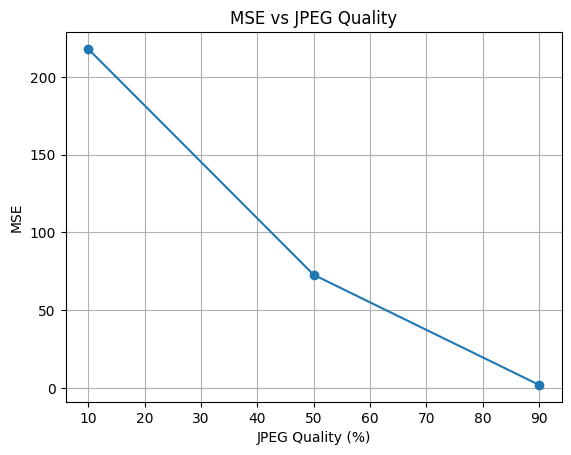

In [ ]:
plt.figure()
plt.plot(df["Quality"], df["MSE"], marker='o')
plt.xlabel("JPEG Quality (%)")
plt.ylabel("MSE")
plt.title("MSE vs JPEG Quality")
plt.grid(True)
plt.show()


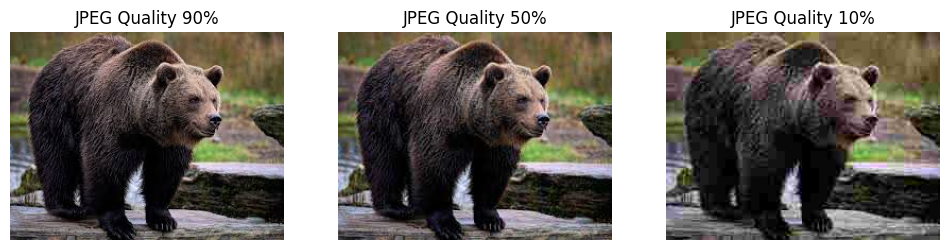

In [ ]:
plt.figure(figsize=(12,6))

for i, q in enumerate(qualities):
    img = cv2.imread(f"beruang_jpeg_{q}.jpg")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(1,3,i+1)
    plt.imshow(img)
    plt.title(f"JPEG Quality {q}%")
    plt.axis("off")

plt.show()


In [ ]:
try:
    cv2.imwrite("beruang_jpeg2000.jp2", cv2.cvtColor(img_color, cv2.COLOR_RGB2BGR))
    print("JPEG2000 berhasil disimpan.")
except:
    print("JPEG2000 tidak tersedia pada environment ini.")


JPEG2000 berhasil disimpan.
